In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import argparse
from skimage import data, segmentation, color
from skimage import graph
import networkx as nx

In [2]:
path = 'train/'

In [3]:
folders = [folder for folder in os.listdir(path)]

In [4]:
folders

['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']

In [5]:
data = pd.DataFrame(columns=['img', 'state'])

In [6]:
for i in range(len(folders)):
    for img in os.listdir(path + folders[i]):
        row = {'img': path + folders[i] + '/' + img,
               'state': folders[i]
              }
        data = data._append(row, ignore_index=True)

In [7]:
data.head()

img                  state
0  train/Potato___Early_blight/b475147c-92bc-419a...  Potato___Early_blight
1  train/Potato___Early_blight/b6220993-c51f-48fa...  Potato___Early_blight
2  train/Potato___Early_blight/b7157976-61c2-4366...  Potato___Early_blight
3  train/Potato___Early_blight/b7883606-5157-4dc1...  Potato___Early_blight
4  train/Potato___Early_blight/b817817e-a6b1-4123...  Potato___Early_blight

In [8]:
data.shape

(900, 2)

In [9]:
def load_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def resize(img_id):
    img = cv2.resize(img, (img_size[0], img_size[1]), intrepolation=cv2.INTER_AREA)
    return img

In [10]:
samples = data.drop_duplicates('state', ignore_index=True)

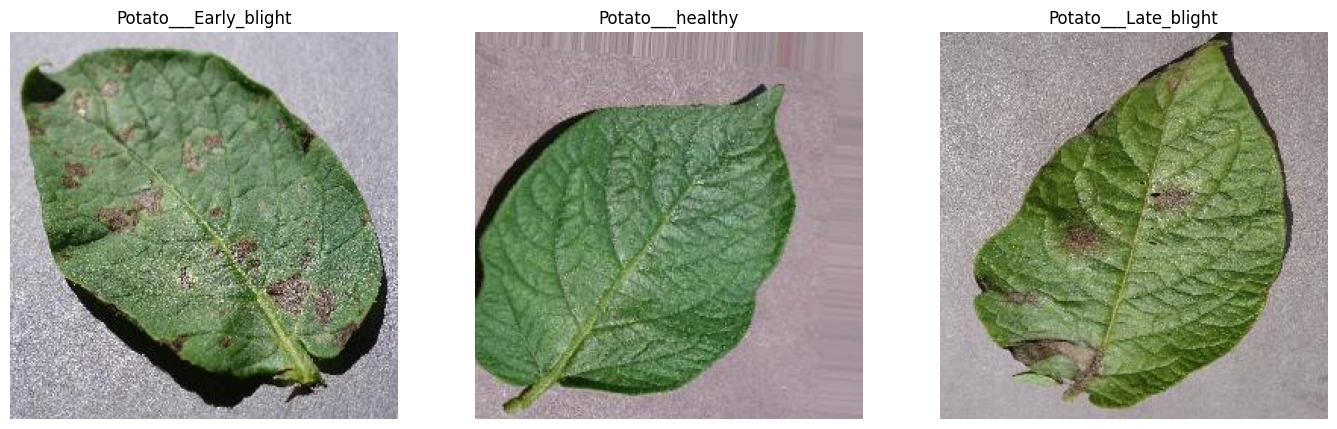

In [11]:
fig = plt.figure(figsize=(17, 12))
rows, cols = 1, 3

for i in range(3):
    label = samples['state'][i]

    fig.add_subplot(rows, cols, i + 1)
    
    plt.imshow((load_img(samples['img'][i])))
    plt.axis('off')
    plt.title(label)

In [12]:
classes = data.groupby(['state'], as_index=False).count()['state']
counts = data.groupby(['state'], as_index=False).count()['img']

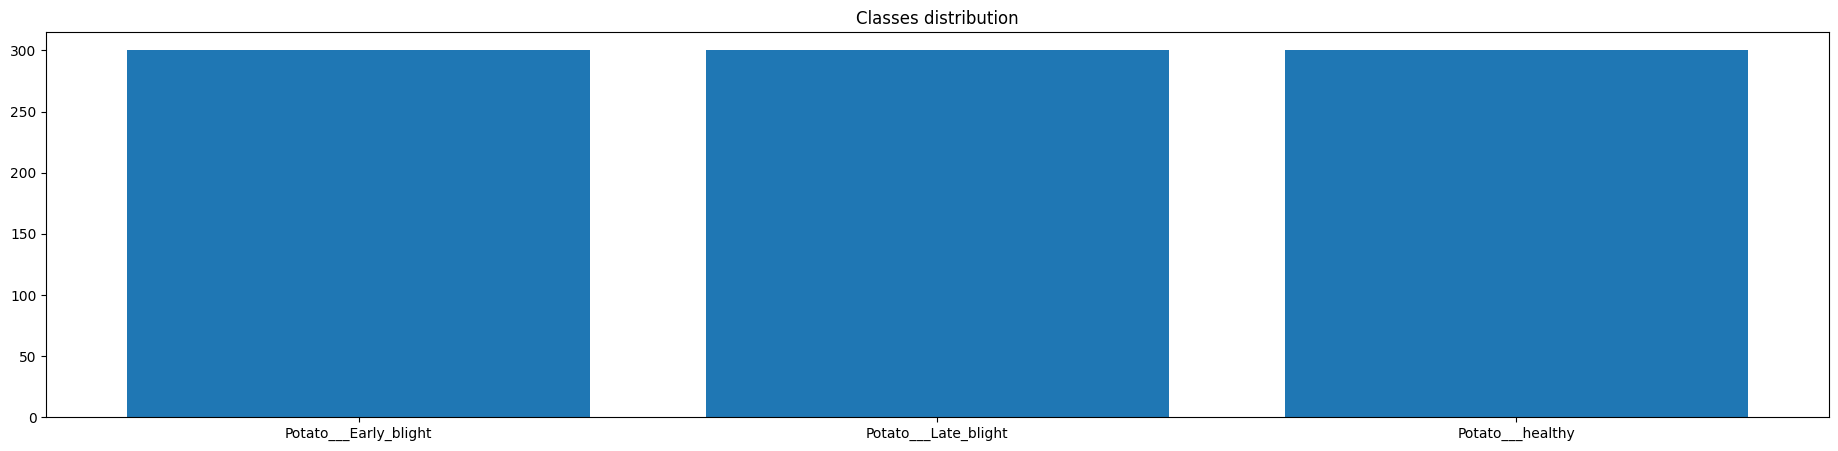

In [13]:
x = classes
y = counts

fig = plt.figure(figsize=(23, 5))
plt.bar(x, y)
plt.xticks()
plt.title("Classes distribution")

plt.show()

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

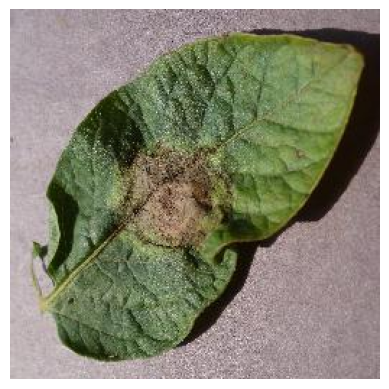

In [19]:
a = load_img(data['img'][700])
plt.imshow(a)
plt.axis('off')

In [20]:
red, green, blue = cv2.split(a)

zeros = np.zeros(blue.shape, np.uint8)

blueBGR = cv2.merge([zeros,zeros,blue])
greenBGR = cv2.merge([zeros,green,zeros])
redBGR = cv2.merge([red,zeros,zeros])

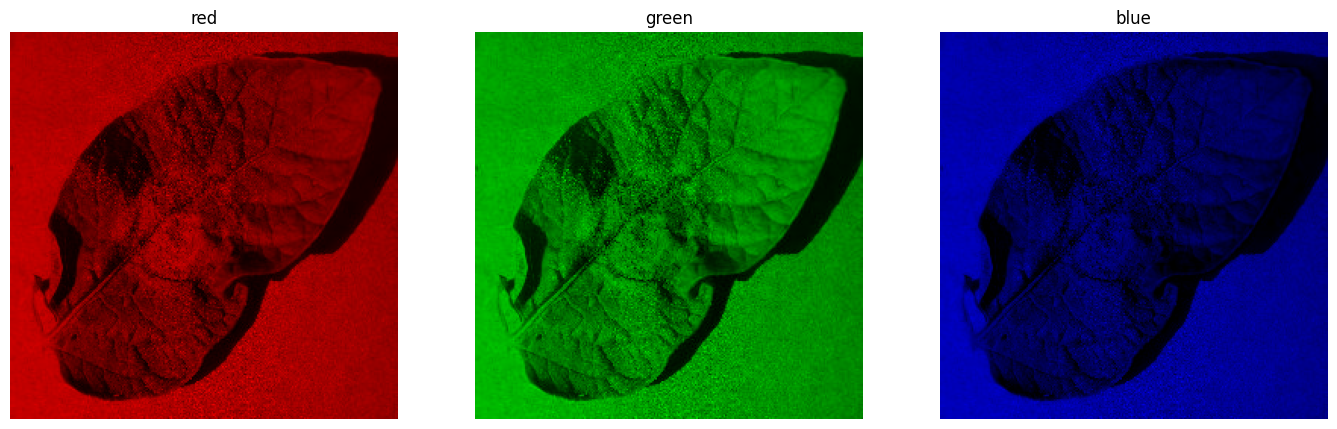

In [21]:
fig = plt.figure(figsize=(17, 12))
rows, cols = 1, 3

for i in range(3):
    label = ['red', 'green', 'blue'][i]

    fig.add_subplot(rows, cols, i + 1)
    
    plt.imshow([redBGR, greenBGR, blueBGR][i])
    plt.axis('off')
    plt.title(label)

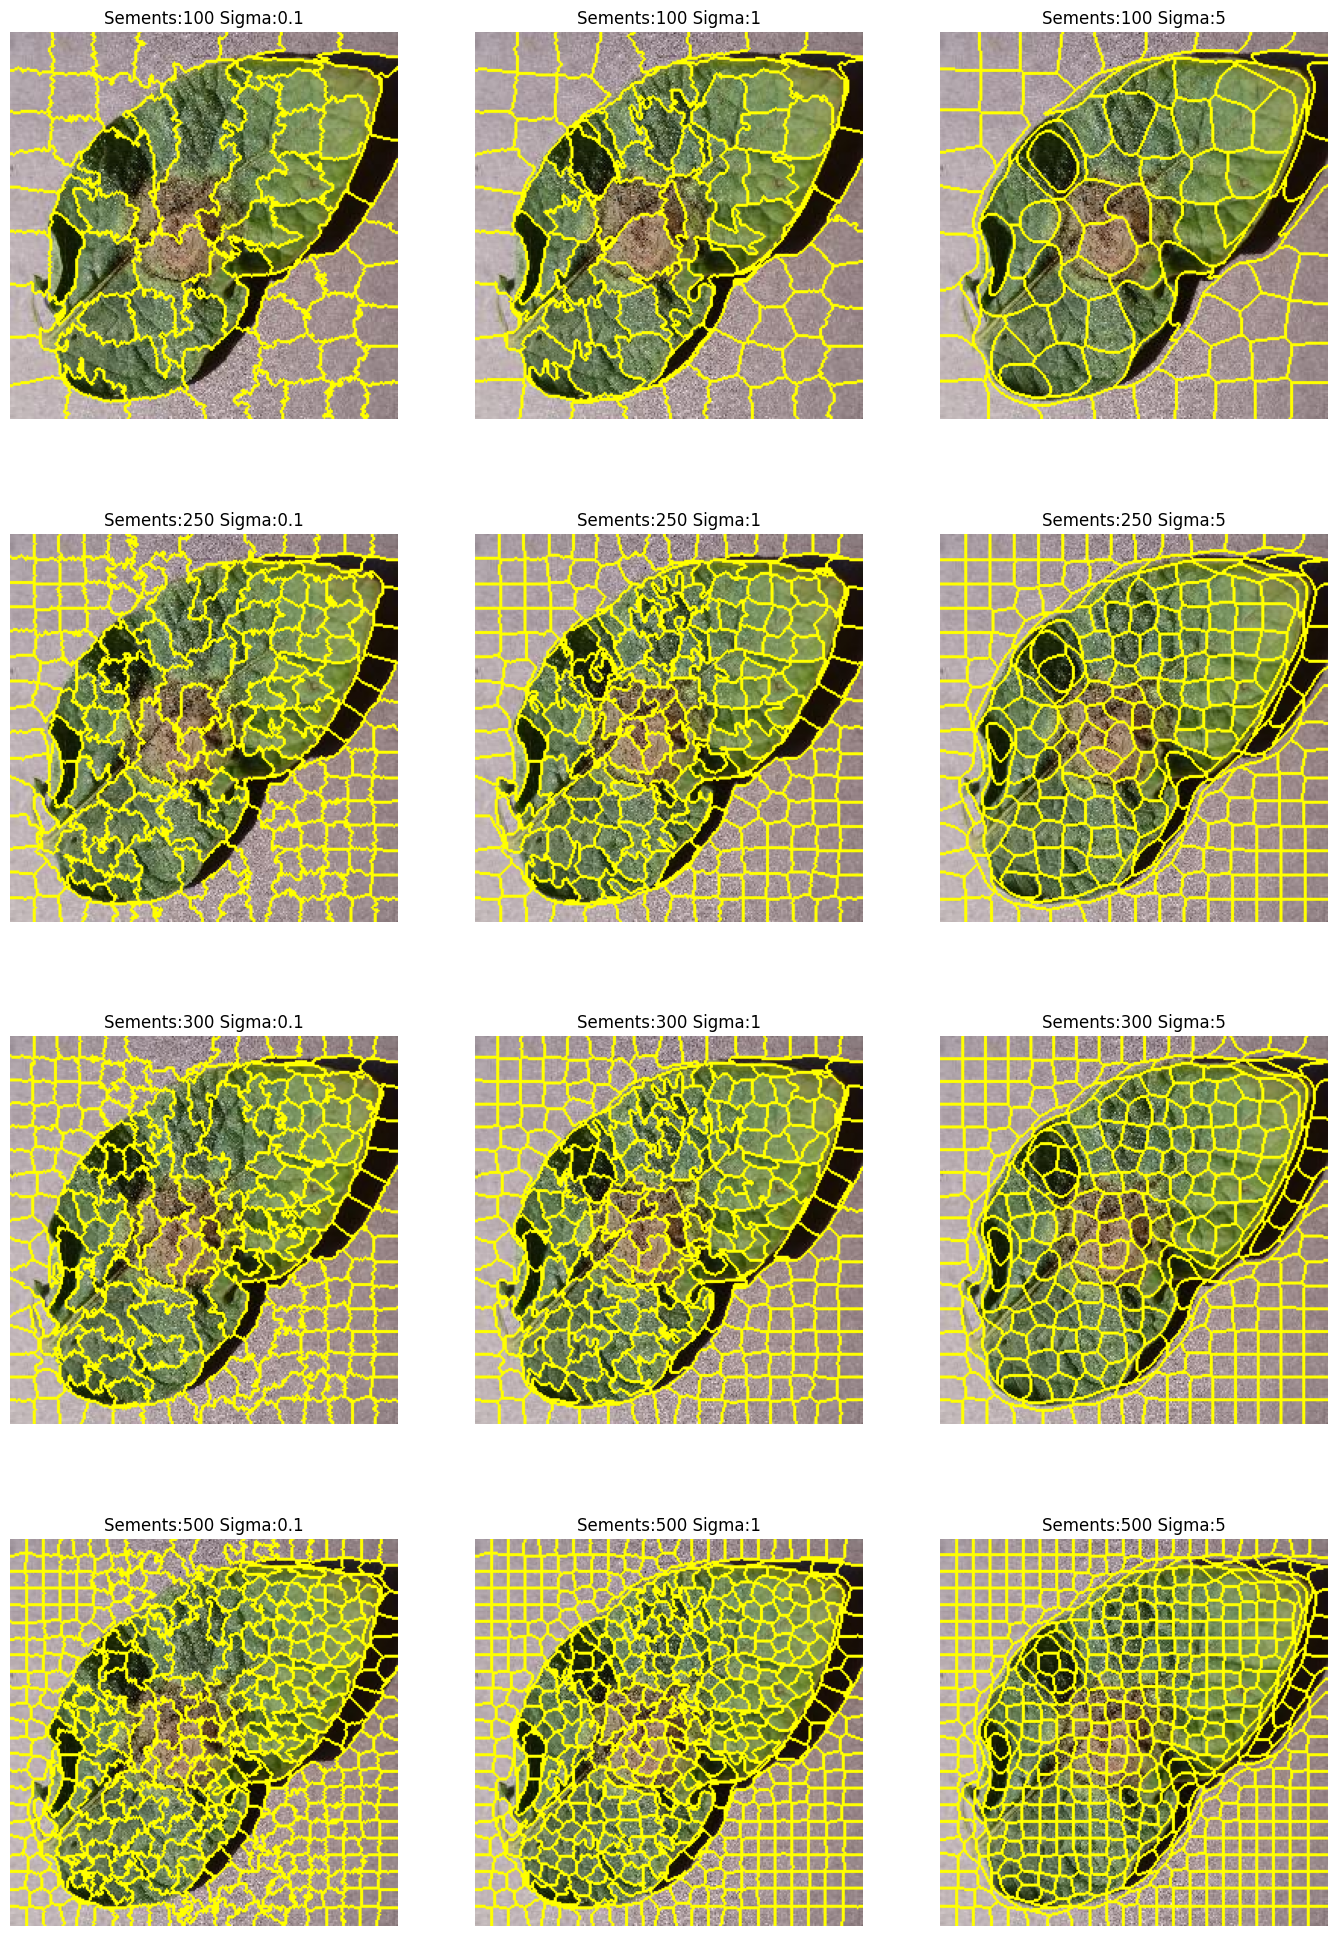

In [22]:
fig = plt.figure(figsize=(17, 25))
rows, cols = 4, 3
i = 1
for numSegments in (100, 250, 300, 500):
    for sigma in (0.1, 1, 5):
        label = 'Sements:' + str(numSegments) + ' Sigma:' + str(sigma)
        fig.add_subplot(rows, cols, i)
        segments = slic(a, n_segments = numSegments, sigma = sigma)
        plt.imshow(mark_boundaries(a, segments))
        plt.axis("off")
        plt.title(label)
        i = i + 1

In [23]:
segments = slic(a, n_segments = 100, sigma = 1)

In [24]:
segments.shape

(256, 256)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

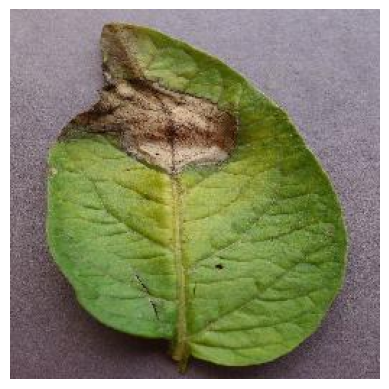

In [26]:
a = load_img(data['img'][800])
plt.imshow(a)
plt.axis('off')

"\nlabels2 = graph.cut_threshold(segments, g, 29)\nout2 = color.label2rgb(labels2, a, kind='avg', bg_label=0)\n\nfig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))\n\nax[0].imshow(out1)\nax[1].imshow(out2)\n\nfor a in ax:\n    a.axis('off')\n\nplt.tight_layout()\n"

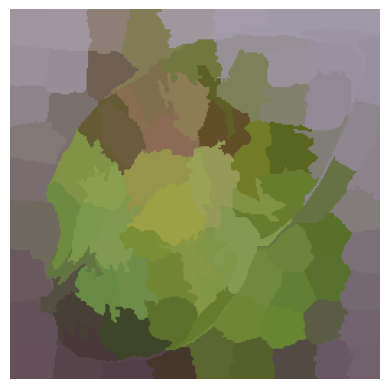

In [27]:
out1 = color.label2rgb(segments, a, kind='avg', bg_label=0)

g = graph.rag_mean_color(a, segments)

plt.imshow(out1)
plt.axis('off')